In [ ]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


VERİ SETİNE HIZLI BAKIŞ

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
#ordinal tanımlama

from pandas.api.types import CategoricalDtype


In [ ]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))
df.cut.dtypes

CategoricalDtype(categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=True)

In [ ]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [ ]:
#Sıralama veri setine uygun değil
cut_kategoriler=["Fair" , "Good", "Very Good", "Premium", "Ideal"]

In [ ]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler, ordered=True))

In [ ]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

BARPLOT-SÜTUN GRAFİĞİ


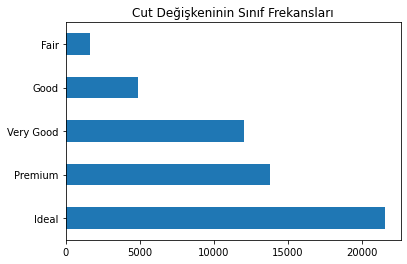

In [ ]:
#barplot 
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

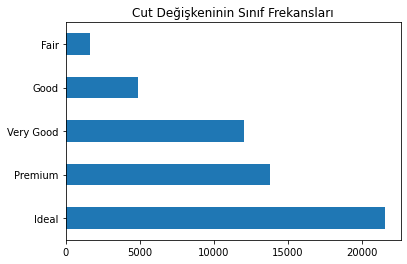

In [ ]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

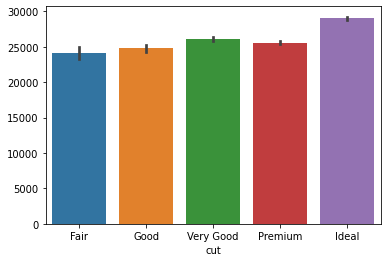

In [ ]:
sns.barplot(x="cut", y=df.cut.index, data=df);

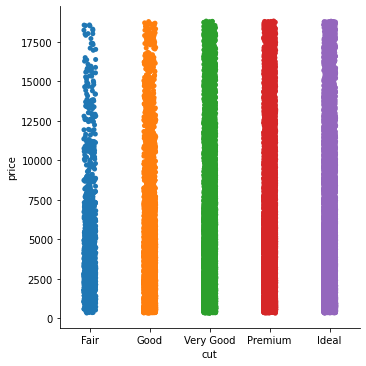

In [ ]:
#çapraz sütun grafileri
sns.catplot(x="cut", y="price",data=df);

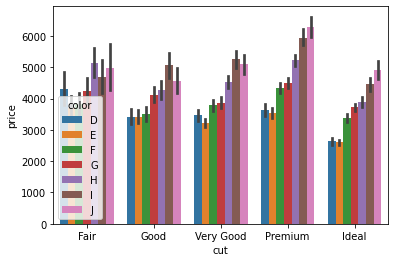

In [ ]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [ ]:
df.groupby(["cut", "color"])["price"].mean() #doğrulama

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

HİSTOGRAM GRAFİĞİ

In [ ]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


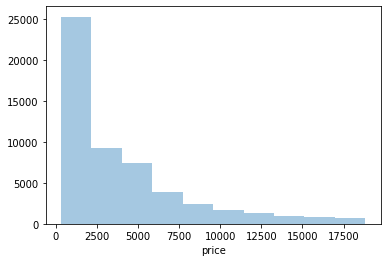

In [ ]:
sns.distplot(df.price,bins=10, kde=False);# 0-17500 price arasındaki değerlerin dağılımı
#bins hassasiyeti artırır

In [ ]:
?sns.distplot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


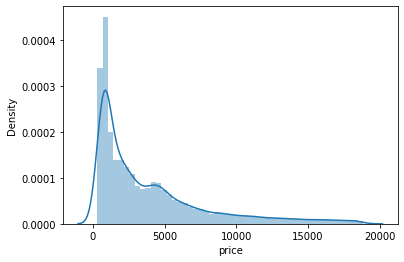

In [ ]:
sns.distplot(df.price, kde=True);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


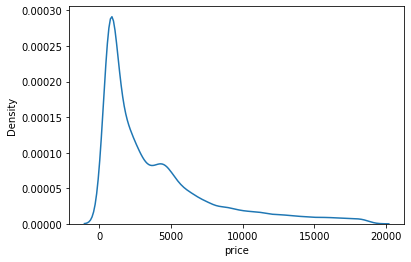

In [ ]:
sns.distplot(df.price, hist=False);

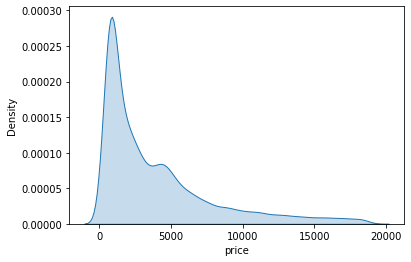

In [ ]:
sns.kdeplot(df.price, shade=True);

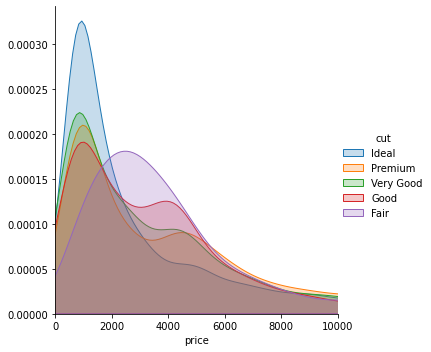

In [ ]:
#yoğunluk grafiğine boyut eklemek için
#boyutları bölmek


(sns
 .FacetGrid(df,
               hue="cut",
               height=5,
               xlim=(0,10000))
 .map(sns.kdeplot, "price", shade=True)
 .add_legend() #cut sınıfının kategorik bilgilerine ulaşmak için
 )

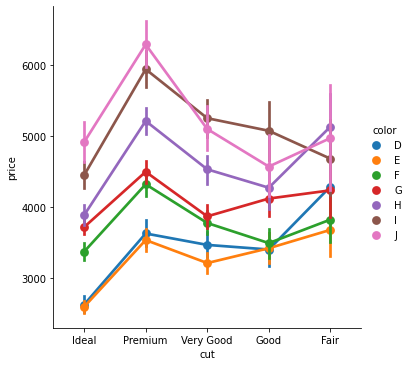

In [ ]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df);

KUTU (BOXPLOT) GRAFİĞİ

In [ ]:
import seaborn as sns
tips= sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


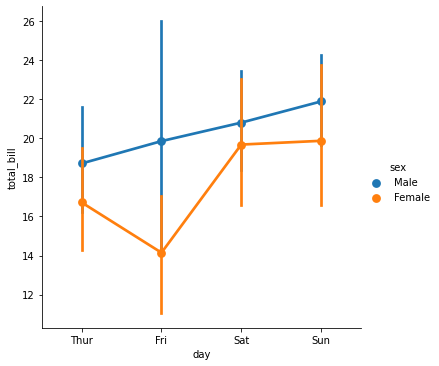

In [ ]:
sns.catplot(x="sex", y="total_bill", hue="", kind="point", data=df);

In [ ]:
df["sex"].value_counts()


Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [ ]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

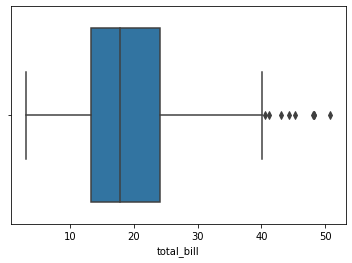

In [ ]:
sns.boxplot(x=df["total_bill"])

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


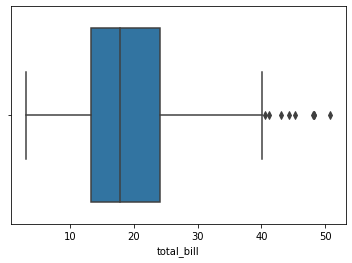

In [ ]:
sns.boxplot(x=df["total_bill"], orient="v");

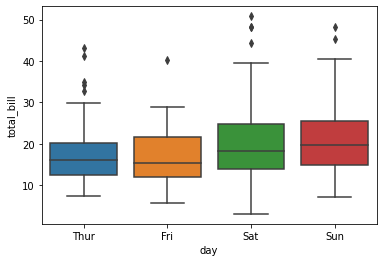

In [ ]:
#hangi günler daha fazla kazanıyoruz
sns.boxplot(x="day", y="total_bill", data=df);

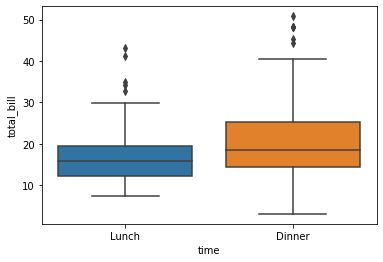

In [ ]:
#sabah mı akşam mı daha fazla kazanıyoruz
sns.boxplot(x="time", y="total_bill", data=df);

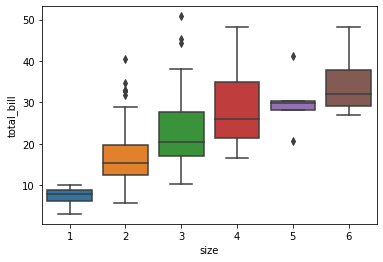

In [ ]:
#kişi sayısı ve kazanç
sns.boxplot(x="size", y="total_bill", data=df);

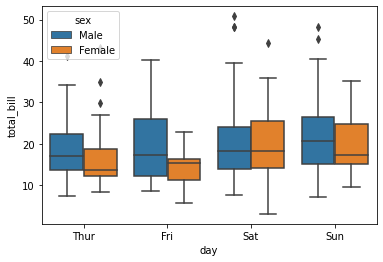

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="sex",data=df);


VIOLIN GRAFİĞİ

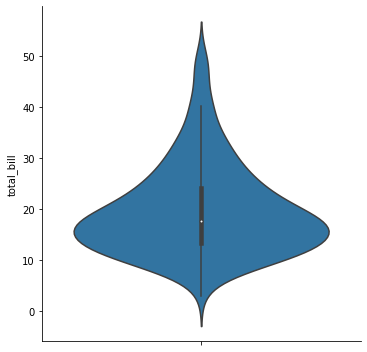

In [ ]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

sns.catplot(y="total_bill", kind="violin", data=df);
#medyan ve merkezi eğilim bilgilerini sunar

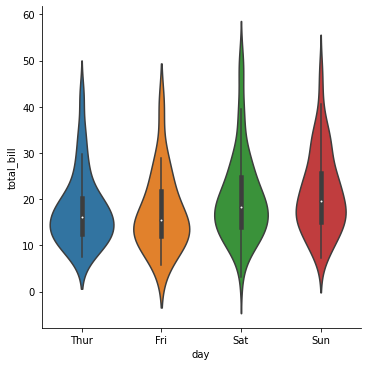

In [ ]:
sns.catplot(x="day",y="total_bill", kind="violin", data=df);

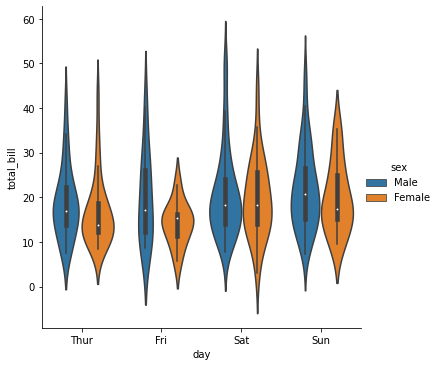

In [ ]:
sns.catplot(x="day",y="total_bill", hue="sex",kind="violin", data=df);

KORELASYON GRAFİĞİ

In [ ]:
#SCATTERPLOT=SAÇILIM GRAFİĞİ;BİRDEN FAZLA DEĞİŞKENİ İNCELİYORUZ

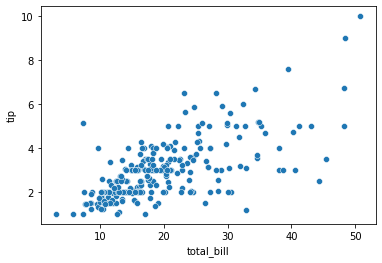

In [ ]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

sns.scatterplot(x="total_bill",y="tip",data=df);

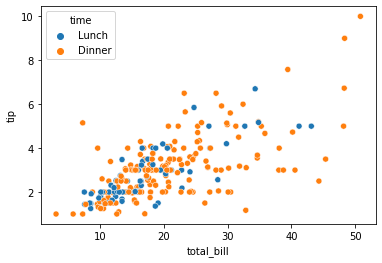

In [ ]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

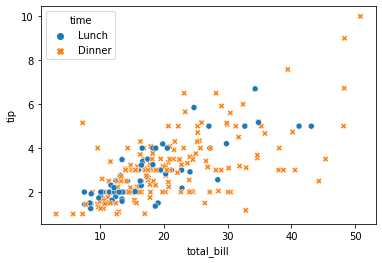

In [ ]:
sns.scatterplot(x="total_bill",y="tip",style="time",hue="time",data=df);

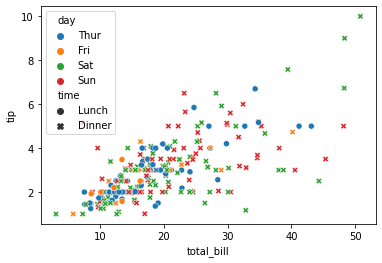

In [ ]:
sns.scatterplot(x="total_bill",y="tip",style="time",hue="day",data=df);

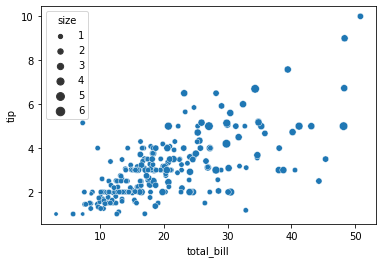

In [ ]:
sns.scatterplot(x="total_bill",y="tip",size="size",data=df);

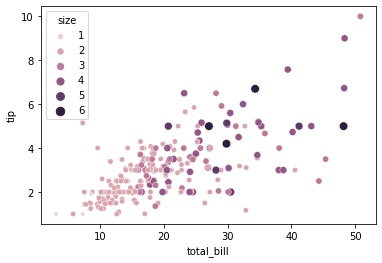

In [ ]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df);

DOĞRUSAL İLİŞKİNİN GÖSTERİLMESİ

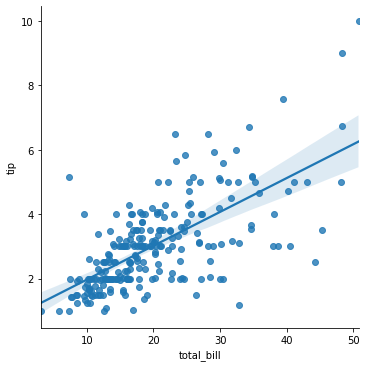

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="total_bill",y="tip", data=df); #linear model plot

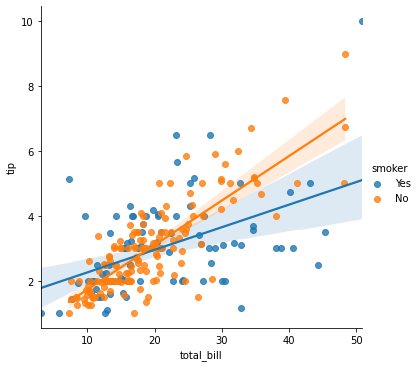

In [ ]:
sns.lmplot(x="total_bill",y="tip", hue="smoker",data=df);

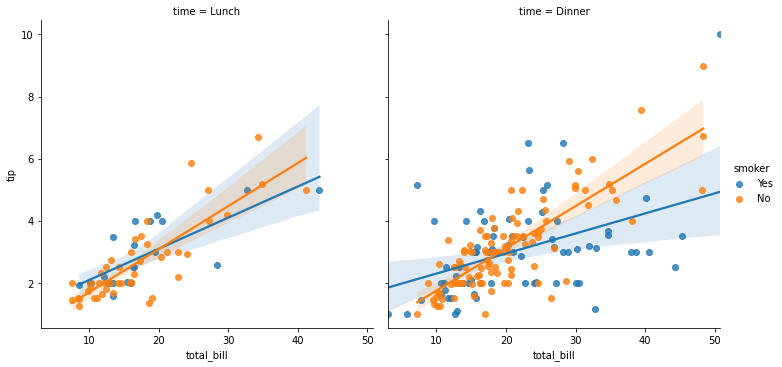

In [ ]:
sns.lmplot(x="total_bill",y="tip", hue="smoker",col="time",data=df);

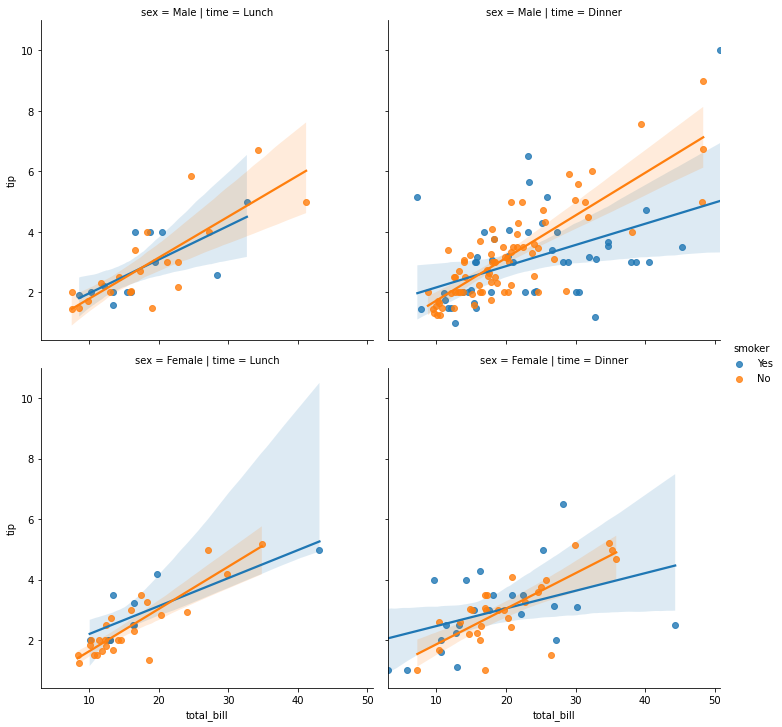

In [ ]:
sns.lmplot(x="total_bill",y="tip", hue="smoker",col="time",row="sex",data=df);

In [ ]:
iris=sns.load_dataset("iris")
df1=iris.copy()
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#SCATTER PLOT MATRİSİ

In [ ]:
df1["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

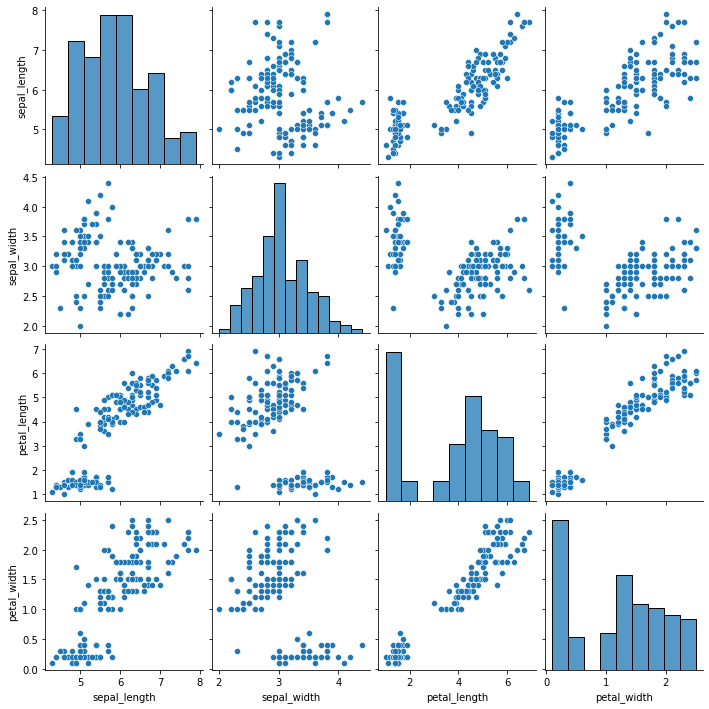

In [ ]:
sns.pairplot(df1)

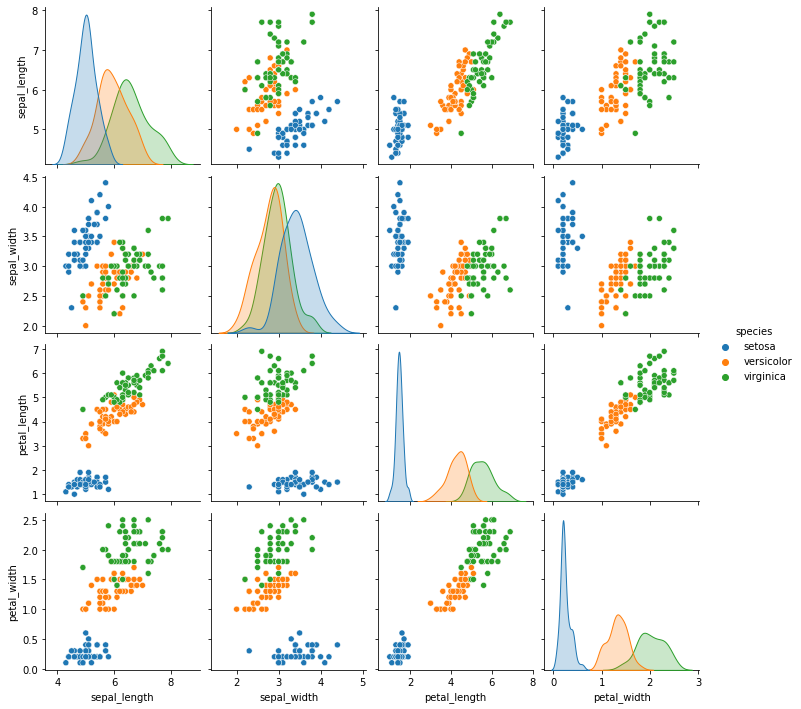

In [ ]:
sns.pairplot(df1, hue="species")

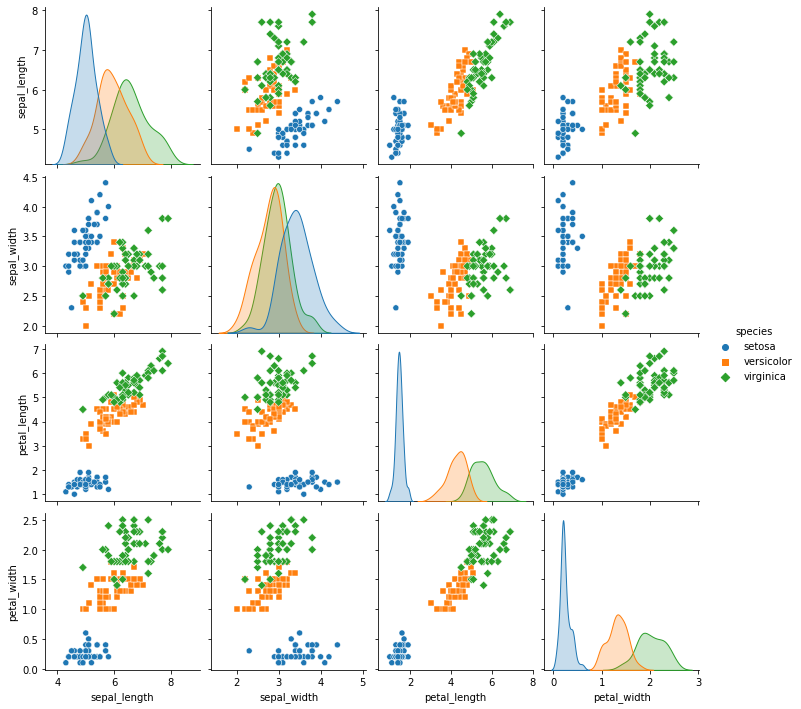

In [ ]:
sns.pairplot(df1, hue="species",markers=["o","s","D"]);

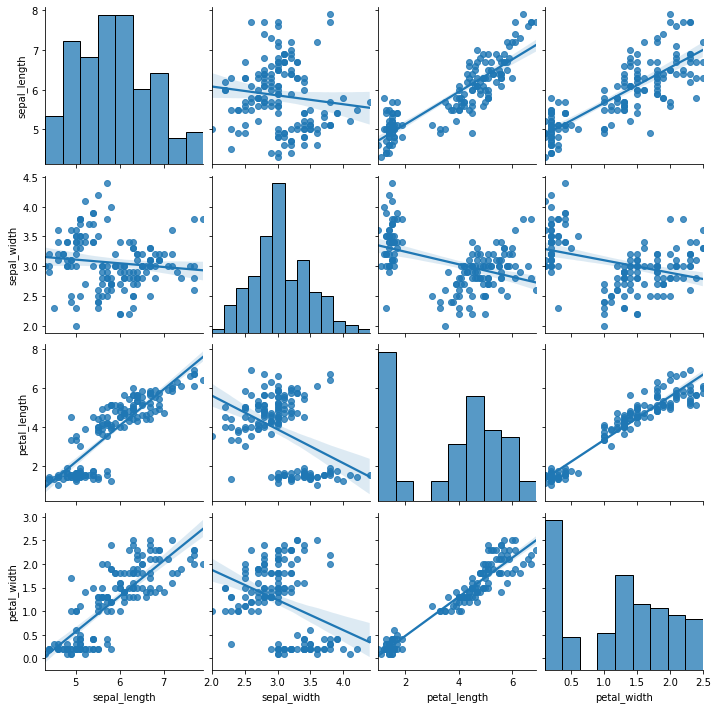

In [ ]:
sns.pairplot(df1,kind="reg");

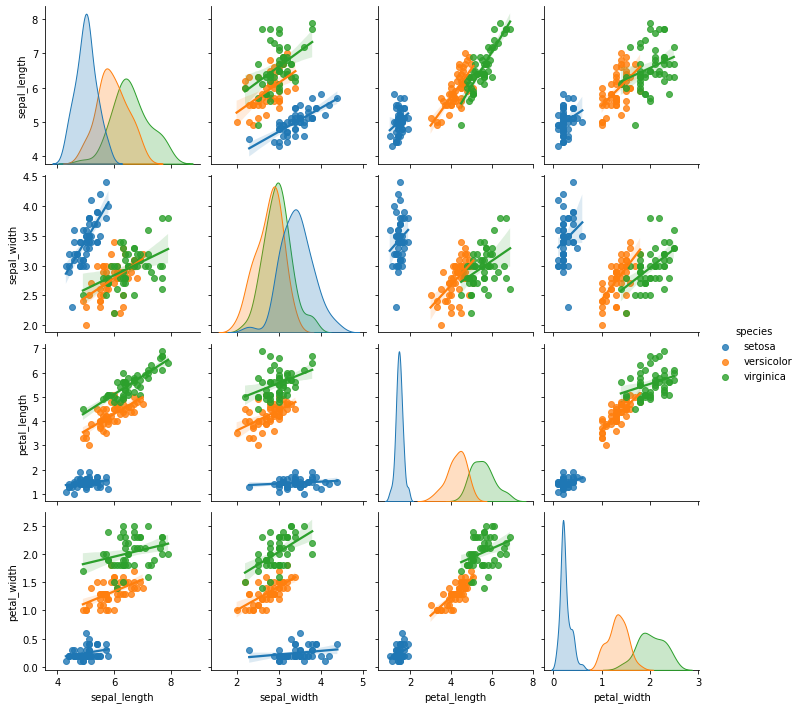

In [ ]:
sns.pairplot(df1,kind="reg",hue="species");

ISI HARİTASI

In [ ]:
import seaborn as sns
flights=sns.load_dataset("flights")
df2=flights.copy()
df2.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df2["year"].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

In [ ]:
#önce pivot table yapıyoruz
df2=df2.pivot("month","year", "passengers");
df2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


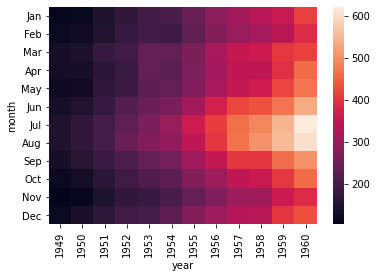

In [ ]:
sns.heatmap(df2);

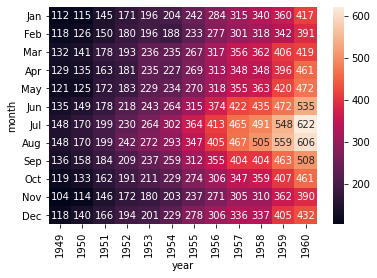

In [ ]:
sns.heatmap(df2, annot=True,fmt="d");

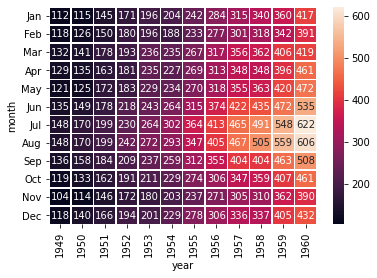

In [ ]:
sns.heatmap(df2, annot=True,fmt="d",linewidths= .5);

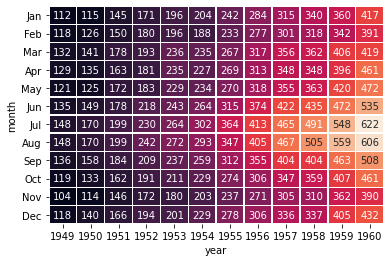

In [ ]:
sns.heatmap(df2, annot=True,fmt="d",linewidths= .5,cbar=False);

BASİT ZAMAN SERİSİ GRAFİĞİ

In [ ]:
!pip install pandas_datareader
import pandas_datareader as pr

In [ ]:
#apple hisseleri
df3=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25")

In [ ]:
df3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.457672


In [ ]:
df3.shape

(917, 6)

In [ ]:
kapanis=df3["Close"]
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

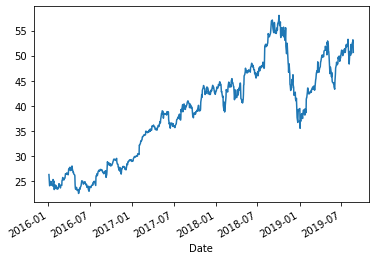

In [ ]:
kapanis.plot();

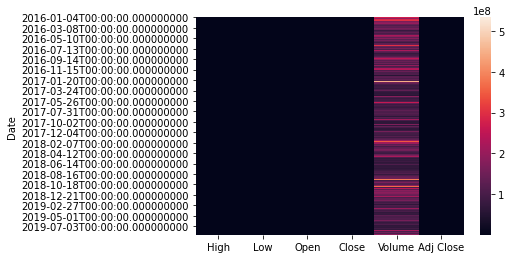

In [ ]:
sns.heatmap(df3);

In [ ]:
import pandas as pd
kapanis.index=pd.DatetimeIndex(kapanis.index)

In [ ]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

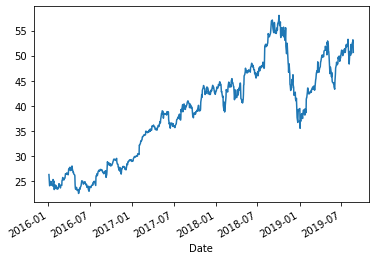

In [ ]:
kapanis.plot()

In [ ]:
df3.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

NameError: ignored